In [3]:
import tensorflow as tf

In [4]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Input

from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from keras.datasets import mnist
import numpy as np 
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [5]:
##import sklearn.datasets as datasets
##df= pd.DataFrame(iris(1,-1))
#df


In [6]:
df = pd.read_csv('E:/AI.anisa.python/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
x = df.drop(['Species','Id'] , axis=1).values
y = df['Species'].values

In [8]:
encoder = LabelEncoder()
y_labeled = encoder.fit_transform(y)
y_labeled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
with open ('encoder.bin' , "wb") as f :
           pickle.dump(encoder , f )

In [10]:
y_onehot = to_categorical(y_labeled)
y_onehot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [11]:
model =  Sequential()

model.add(Input(shape=(4,)))
model.add(Dense(4 ,activation= 'relu'))
model.add(Dense(3 ,activation= 'relu'))
model.add(Dense(3,activation= 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47 (188.00 B)

 Trainable params: 47 (188.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
result = model.fit(x ,y_onehot , epochs= 300 , validation_split= 0.1)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3704 - loss: 2.7271 - val_accuracy: 0.0000e+00 - val_loss: 0.9279
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3704 - loss: 2.6423 - val_accuracy: 0.0000e+00 - val_loss: 0.8775
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3704 - loss: 2.5641 - val_accuracy: 0.0000e+00 - val_loss: 0.8348
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3704 - loss: 2.4871 - val_accuracy: 0.0000e+00 - val_loss: 0.8084
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3704 - loss: 2.4146 - val_accuracy: 0.0000e+00 - val_loss: 0.7889
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3704 - loss: 2.3473 - val_accuracy: 0.0000e+00 - val_loss: 0.7769
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3704 - loss: 2.2816 - val_accuracy: 0.0000e+00 - val_loss: 0.7782
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3704 - loss: 2.2238 - val_

In [14]:
type(result)

keras.src.callbacks.history.History

Text(0.5, 0, 'epoch')

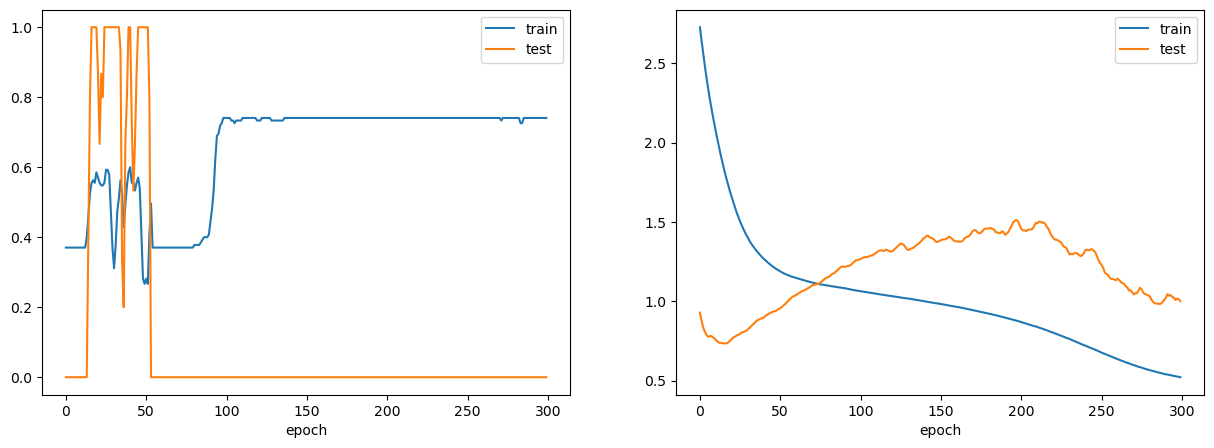

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['train' , 'test' ] )
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['train' , 'test' ] )
plt.xlabel('epoch')

In [16]:
model.save("model.h5")

In [17]:
encoder.inverse_transform([0])

array(['Iris-setosa'], dtype=object)

In [19]:
import keras
model1= keras.models.load_model('model.h5')

In [ ]:
encoder.inverse_transform([np.argmax(r))